# Pandas

In [1]:
import numpy as np
import pandas as pd

## Series

###  Создание

**Можем создать Series из словаря или массива данных.**   
Пример создания из списка с указанием идексов:

In [2]:
l = [11,22,33]
ser = pd.Series(data=l, index=['a', 'b', 'c'])
ser

a    11
b    22
c    33
dtype: int64

Если не указываем индексы, они генерируются автоматически.

In [2]:
l = [[11,1],[22],[33,2]]
ser = pd.Series(data=l)
ser

0    [11, 1]
1       [22]
2    [33, 2]
dtype: object

Пример создания из словаря:

In [3]:
d = {'a': 1, 'b': 2, 'c': 3}
ser = pd.Series(data=d)
ser

a    1
b    2
c    3
dtype: int64

Если создаём из словаря и указываем индексы - можем добавить индексы , которых нет в словаре и выбрать из словаря те индексы, которые нам нужны.

In [4]:
d = {'a': 1, 'b': 2, 'c': 3}
ser = pd.Series(data=d, index=['x', 'y', 'z', 'a', 'b'])
ser

x    NaN
y    NaN
z    NaN
a    1.0
b    2.0
dtype: float64

Создадим Series для дальнейшей работы.

In [5]:
heights = pd.Series([1.85, 1.80, 1.70, 1.64], index=["Tinky Winky", "Dipsy", "Laa-Laa", "Po"])
heights

Tinky Winky    1.85
Dipsy          1.80
Laa-Laa        1.70
Po             1.64
dtype: float64

Series похожи на numpy.ndarray и очень просто переходить от одного формата хранения данных к другому.

In [6]:
arr = heights.values

In [7]:
arr, type(arr)

(array([1.85, 1.8 , 1.7 , 1.64]), numpy.ndarray)

values - атрибут ndarray, а не функция, потому попытка его вызвать приведёт к ошибке:

In [8]:
heights.values

array([1.85, 1.8 , 1.7 , 1.64])

In [9]:
heights.tolist()

[1.85, 1.8, 1.7, 1.64]

In [10]:
list(arr)

[1.85, 1.8, 1.7, 1.64]

In [11]:
index = heights.index
index

Index(['Tinky Winky', 'Dipsy', 'Laa-Laa', 'Po'], dtype='object')

In [12]:
type(index)

pandas.core.indexes.base.Index

In [14]:
np.array(index)

array(['Tinky Winky', 'Dipsy', 'Laa-Laa', 'Po'], dtype=object)

In [15]:
arr

array([1.85, 1.8 , 1.7 , 1.64])

Тут указание типа не сработает:

In [16]:
pd.Series(arr, dtype=int, index=index)

Tinky Winky    1.85
Dipsy          1.80
Laa-Laa        1.70
Po             1.64
dtype: float64

Если хотим его указать, можем сделать так:

In [17]:
pd.Series(arr, index=index).astype('int')

Tinky Winky    1
Dipsy          1
Laa-Laa        1
Po             1
dtype: int64

### Индексация

Индексация по значениям, срезы данных по индексам, индексация по номеру индекса аналогично numpy.ndarray.

In [18]:
heights > 1.7

Tinky Winky     True
Dipsy           True
Laa-Laa        False
Po             False
dtype: bool

In [28]:
heights[heights > 1.7]

Tinky Winky    1.85
Dipsy          1.80
dtype: float64

In [29]:
heights[2]

1.7

In [19]:
heights[:3]

Tinky Winky    1.85
Dipsy          1.80
Laa-Laa        1.70
dtype: float64

Можем доступаться к записям по пользовательским индексам, даже если они строки:

In [20]:
heights.Dipsy

1.8

Но если строчные индексы начинаются не с буквы латиницы, вызвать колонку как атрибут объекта не выйдет:

In [21]:
heights['1Dipsy'] = 1.5

In [22]:
heights.1Dipsy

SyntaxError: invalid decimal literal (4193398814.py, line 1)

Если есть пробелы в названии колонки, то обращаемся только так, потому рекомендую не называть колонки с пробелами и переименовывать, если они изначально были в данных:

Три альтернативных способа обратиться к одной и той же записи:

In [23]:
heights['Tinky Winky']

1.85

In [24]:
heights.loc['Tinky Winky']

1.85

In [25]:
heights[0]

1.85

### Функции над Series   

Объекты Series, подобно ndarray, могут быть переданы в качестве аргументов большинству функций из Numpy.

Все функции над объектом `pd.Series`:

In [26]:
dir(heights)

['Dipsy',
 'Po',
 'T',
 '_AXIS_LEN',
 '_AXIS_ORDERS',
 '_AXIS_TO_AXIS_NUMBER',
 '_HANDLED_TYPES',
 '__abs__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__long__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdi

In [27]:
heights.mean(), heights.std()

(1.698, 0.13791301606447454)

In [35]:
np.mean(heights), np.std(heights, ddof=1),  np.std(heights),  np.std(heights, ddof=0)

(1.698, 0.13791301606447454, 0.12335315156087423, 0.12335315156087423)

Можем вызовом одной функции `describe` описать данные в `Series`.

In [31]:
heights.describe()

count    5.000000
mean     1.698000
std      0.137913
min      1.500000
25%      1.640000
50%      1.700000
75%      1.800000
max      1.850000
dtype: float64

Можем добавить персентилей.

In [37]:
np.arange(0,1,0.1)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [38]:
heights.describe(percentiles=np.arange(0.1,1,0.1))

count    5.000000
mean     1.698000
std      0.137913
min      1.500000
10%      1.556000
20%      1.612000
30%      1.652000
40%      1.676000
50%      1.700000
60%      1.740000
70%      1.780000
80%      1.810000
90%      1.830000
max      1.850000
dtype: float64

Может быть полезно если к примеру вам в задаче надо брать в качестве признаков - какие-то персентили некоторого значения для прогнозирования другого значения.

#### Конвертация pd.Series в другие форматы.

In [39]:
heights.to_dict()

{'Tinky Winky': 1.85, 'Dipsy': 1.8, 'Laa-Laa': 1.7, 'Po': 1.64, '1Dipsy': 1.5}

In [40]:
heights.to_json()

'{"Tinky Winky":1.85,"Dipsy":1.8,"Laa-Laa":1.7,"Po":1.64,"1Dipsy":1.5}'

In [41]:
heights.to_json(orient='table')

'{"schema":{"fields":[{"name":"index","type":"string"},{"name":"values","type":"number"}],"primaryKey":["index"],"pandas_version":"0.20.0"},"data":[{"index":"Tinky Winky","values":1.85},{"index":"Dipsy","values":1.8},{"index":"Laa-Laa","values":1.7},{"index":"Po","values":1.64},{"index":"1Dipsy","values":1.5}]}'

```{
    "schema": {
        "fields": [{
            "name": "index",
            "type": "string"
        }, {
            "name": "values",
            "type": "number"
        }],
        "primaryKey": ["index"],
        "pandas_version":
        "0.20.0"
    },
    "data": [{
        "index": "Tinky Winky",
        "values": 1.85
    }, {
        "index": "Dipsy",
        "values": 1.8
    }, {
        "index": "Laa-Laa",
        "values": 1.7
    }, {
        "index": "Po",
        "values": 1.64
    }, {
        "index": "1Dipsy",
        "values": 1.5
    }]
}```

### Пропущенные значения 

Series поддерживает пропуски в данных.

In [42]:
heights["Sun"] = np.nan

In [43]:
heights

Tinky Winky    1.85
Dipsy          1.80
Laa-Laa        1.70
Po             1.64
1Dipsy         1.50
Sun             NaN
dtype: float64

**Заполнение пропущенных значений**

По умолчанию `inplace=False`. В таком случае метод возвращает структуру с внесёнными изменениями.

In [44]:
heights.fillna(heights.median())

Tinky Winky    1.85
Dipsy          1.80
Laa-Laa        1.70
Po             1.64
1Dipsy         1.50
Sun            1.70
dtype: float64

In [45]:
heights

Tinky Winky    1.85
Dipsy          1.80
Laa-Laa        1.70
Po             1.64
1Dipsy         1.50
Sun             NaN
dtype: float64

Если `inplace=True` , то метод возвращает None и примененные трансформации записываются в объект Series/DataFrame, который мы передали в метод.

In [49]:
heights.fillna(heights.median(), inplace=True)

In [50]:
type(heights)

pandas.core.series.Series

Так делать нельзя - потеряете данные.

In [46]:
heights_test = heights.copy()

In [47]:
heights_test = heights_test.fillna(heights_test.median(), inplace=True)

In [48]:
type(heights_test)

NoneType

## DataFrame

### Создание и изменение

**Вариант создания 1: из массива numpy, указав названия строк и столбцов.**  

In [52]:
dates = pd.date_range("20210101", periods=6)

In [53]:
dates

DatetimeIndex(['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04',
               '2021-01-05', '2021-01-06'],
              dtype='datetime64[ns]', freq='D')

In [54]:
np.random.randn(6, 4)*10

array([[ -4.9230747 , -11.83487196,   4.03957555,  11.33653619],
       [  5.80418379,  12.10514306,  15.1307405 ,  -0.10499585],
       [ -4.70957659,  -9.76534494,  -4.81967343,  -9.53761139],
       [ 14.57021165,   5.56157715,  -7.61089426,   4.87668611],
       [  0.55857436,  21.46433412,   2.38739672,   6.30502897],
       [  0.44979715,  -9.54876516, -15.24401004,   2.67522158]])

In [55]:
df1 = pd.DataFrame(np.random.randn(6, 4)*10, index=dates, columns=list("ABCD"))
df1

,A,B,C,D
2021-01-01,-11.828958,-1.265760,-10.959991,9.017775
2021-01-02,1.412821,-7.595661,-16.589184,0.228118
2021-01-03,1.559680,2.265940,3.087734,-2.724572
2021-01-04,-0.984797,-5.031688,-8.792354,-14.732788
2021-01-05,-16.002462,15.664063,-2.414891,3.934268
2021-01-06,-2.375103,-4.655818,-19.085339,4.545580


**Вариант создания 2: из словаря numpy массивов, списков или даже константных значений для некоторых колонок.**

In [56]:
df2 = pd.DataFrame(
    {
        "A": 1.0,
        "B": pd.Timestamp("20210102"),
        "C": pd.Series(1, index=list(range(4,8)), dtype="float32"),
        "D": np.array([3] * 4, dtype="int32"),
        "E": pd.Categorical(["test", "train", "test", "train"]),
        "F": "foo",
        "G": [[3,4]]*4
    }
)

In [57]:
df2

,A,B,C,D,E,F,G
4,1.0,2021-01-02,1.0,3,test,foo,"[3, 4]"
5,1.0,2021-01-02,1.0,3,train,foo,"[3, 4]"
6,1.0,2021-01-02,1.0,3,test,foo,"[3, 4]"
7,1.0,2021-01-02,1.0,3,train,foo,"[3, 4]"


In [58]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
G            object
dtype: object

In [59]:
df2.F

4    foo
5    foo
6    foo
7    foo
Name: F, dtype: object

In [60]:
df2.E

4     test
5    train
6     test
7    train
Name: E, dtype: category
Categories (2, object): ['test', 'train']

In [61]:
df2.E

4     test
5    train
6     test
7    train
Name: E, dtype: category
Categories (2, object): ['test', 'train']

In [62]:
pd.Categorical(df2.F)

['foo', 'foo', 'foo', 'foo']
Categories (1, object): ['foo']

### Функции датафрейма

In [63]:
df2

,A,B,C,D,E,F,G
4,1.0,2021-01-02,1.0,3,test,foo,"[3, 4]"
5,1.0,2021-01-02,1.0,3,train,foo,"[3, 4]"
6,1.0,2021-01-02,1.0,3,test,foo,"[3, 4]"
7,1.0,2021-01-02,1.0,3,train,foo,"[3, 4]"


In [ ]:
dir(df2)

Можем легко конвертировать dataframe в numpy array и наоборот.

In [64]:
df1

,A,B,C,D
2021-01-01,-11.828958,-1.265760,-10.959991,9.017775
2021-01-02,1.412821,-7.595661,-16.589184,0.228118
2021-01-03,1.559680,2.265940,3.087734,-2.724572
2021-01-04,-0.984797,-5.031688,-8.792354,-14.732788
2021-01-05,-16.002462,15.664063,-2.414891,3.934268
2021-01-06,-2.375103,-4.655818,-19.085339,4.545580


In [65]:
df1_np = df1.to_numpy()
df1_np

array([[-11.82895819,  -1.2657601 , -10.95999108,   9.01777513],
       [  1.41282135,  -7.59566101, -16.58918415,   0.22811765],
       [  1.55968047,   2.26594041,   3.08773428,  -2.72457215],
       [ -0.98479687,  -5.0316879 ,  -8.79235439, -14.73278781],
       [-16.00246168,  15.66406297,  -2.41489053,   3.93426826],
       [ -2.37510275,  -4.65581777, -19.08533913,   4.54558047]])

In [66]:
df1.size

24

In [67]:
df1.shape

(6, 4)

In [68]:
df1_np.shape

(6, 4)

In [69]:
df1_values_copy = pd.DataFrame(df1_np)

In [95]:
df1_values_copy

,0,1,2,3
0,-20.030563,1.821781,-0.659566,-19.219781
1,3.473860,-21.731858,10.506968,12.433388
2,12.360319,-6.686422,-4.420733,-4.956368
3,15.104402,12.571765,-4.975746,3.745905
4,-2.692079,-15.265026,14.483305,-3.872239
5,-12.177460,-9.300167,1.506178,0.863148


In [74]:
df1_values_copy.columns = df1.columns
df1_values_copy.index = df1.index

In [97]:
df1_values_copy

,A,B,C,D
2021-01-01,-20.030563,1.821781,-0.659566,-19.219781
2021-01-02,3.473860,-21.731858,10.506968,12.433388
2021-01-03,12.360319,-6.686422,-4.420733,-4.956368
2021-01-04,15.104402,12.571765,-4.975746,3.745905
2021-01-05,-2.692079,-15.265026,14.483305,-3.872239
2021-01-06,-12.177460,-9.300167,1.506178,0.863148


 Количество значений должно быть равное количеству индексов в DataFrame.

In [102]:
df1_values_copy.index = df1.index.tolist()+[6]

ValueError: Length mismatch: Expected axis has 6 elements, new values have 7 elements

In [101]:
df1_values_copy.columns = df1.columns.tolist()+['E']

ValueError: Length mismatch: Expected axis has 4 elements, new values have 5 elements

Переименование колонок - любым из двух способов:

In [75]:
df1_values_copy.rename(columns={'A':'X_01'}, inplace=True)

In [76]:
df1_values_copy

,X_01,B,C,D
2021-01-01,-11.828958,-1.265760,-10.959991,9.017775
2021-01-02,1.412821,-7.595661,-16.589184,0.228118
2021-01-03,1.559680,2.265940,3.087734,-2.724572
2021-01-04,-0.984797,-5.031688,-8.792354,-14.732788
2021-01-05,-16.002462,15.664063,-2.414891,3.934268
2021-01-06,-2.375103,-4.655818,-19.085339,4.545580


In [77]:
df1_values_copy.rename({'X_01':'X_02'}, axis=1, inplace=True)

In [78]:
df1_values_copy

,X_02,B,C,D
2021-01-01,-11.828958,-1.265760,-10.959991,9.017775
2021-01-02,1.412821,-7.595661,-16.589184,0.228118
2021-01-03,1.559680,2.265940,3.087734,-2.724572
2021-01-04,-0.984797,-5.031688,-8.792354,-14.732788
2021-01-05,-16.002462,15.664063,-2.414891,3.934268
2021-01-06,-2.375103,-4.655818,-19.085339,4.545580


### Индексация
Обращение к элементам и выборка данных из фрейма

In [79]:
df2

,A,B,C,D,E,F,G
4,1.0,2021-01-02,1.0,3,test,foo,"[3, 4]"
5,1.0,2021-01-02,1.0,3,train,foo,"[3, 4]"
6,1.0,2021-01-02,1.0,3,test,foo,"[3, 4]"
7,1.0,2021-01-02,1.0,3,train,foo,"[3, 4]"


In [80]:
df2[3,'B'] # так обращаться не получится, выдастся ошибка

KeyError: (3, 'B')

In [81]:
df2.at[4, "B"]

Timestamp('2021-01-02 00:00:00')

In [82]:
df2.B = pd.date_range('2021-01-02', periods=4)

In [83]:
df2

,A,B,C,D,E,F,G
4,1.0,2021-01-02,1.0,3,test,foo,"[3, 4]"
5,1.0,2021-01-03,1.0,3,train,foo,"[3, 4]"
6,1.0,2021-01-04,1.0,3,test,foo,"[3, 4]"
7,1.0,2021-01-05,1.0,3,train,foo,"[3, 4]"


In [84]:
df2.loc[4]

A                    1.0
B    2021-01-02 00:00:00
C                    1.0
D                      3
E                   test
F                    foo
G                 [3, 4]
Name: 4, dtype: object

In [85]:
df2.iloc[0]

A                    1.0
B    2021-01-02 00:00:00
C                    1.0
D                      3
E                   test
F                    foo
G                 [3, 4]
Name: 4, dtype: object

In [86]:
df2.loc[4]['B']

Timestamp('2021-01-02 00:00:00')

In [87]:
df2.loc[4].B

Timestamp('2021-01-02 00:00:00')

In [88]:
df2.B.loc[4], df2.B[4]

(Timestamp('2021-01-02 00:00:00'), Timestamp('2021-01-02 00:00:00'))

In [89]:
df2[["A", "B"]].loc[[5,4]]

,A,B
5,1.0,2021-01-03
4,1.0,2021-01-02


In [90]:
df2.loc[[5,4]][['A', 'B']]

,A,B
5,1.0,2021-01-03
4,1.0,2021-01-02


### Внесение измений в данные в датафрейме

In [91]:
df2

,A,B,C,D,E,F,G
4,1.0,2021-01-02,1.0,3,test,foo,"[3, 4]"
5,1.0,2021-01-03,1.0,3,train,foo,"[3, 4]"
6,1.0,2021-01-04,1.0,3,test,foo,"[3, 4]"
7,1.0,2021-01-05,1.0,3,train,foo,"[3, 4]"


In [92]:
df2.at[5, "B"] = "f"
df2

,A,B,C,D,E,F,G
4,1.0,2021-01-02 00:00:00,1.0,3,test,foo,"[3, 4]"
5,1.0,f,1.0,3,train,foo,"[3, 4]"
6,1.0,2021-01-04 00:00:00,1.0,3,test,foo,"[3, 4]"
7,1.0,2021-01-05 00:00:00,1.0,3,train,foo,"[3, 4]"


In [93]:
df2.shape

(4, 7)

In [94]:
df2.loc[7] = [3.1415, "c", False,3.1415, "test", False, [6,3]]
df2

/Users/hanna.pylieva/opt/anaconda3/envs/py39/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3162: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).ndim


,A,B,C,D,E,F,G
4,1.0000,2021-01-02 00:00:00,1.0,3.0000,test,foo,"[3, 4]"
5,1.0000,f,1.0,3.0000,train,foo,"[3, 4]"
6,1.0000,2021-01-04 00:00:00,1.0,3.0000,test,foo,"[3, 4]"
7,3.1415,c,False,3.1415,test,False,"[6, 3]"


In [95]:
df1

,A,B,C,D
2021-01-01,-11.828958,-1.265760,-10.959991,9.017775
2021-01-02,1.412821,-7.595661,-16.589184,0.228118
2021-01-03,1.559680,2.265940,3.087734,-2.724572
2021-01-04,-0.984797,-5.031688,-8.792354,-14.732788
2021-01-05,-16.002462,15.664063,-2.414891,3.934268
2021-01-06,-2.375103,-4.655818,-19.085339,4.545580


Аналогично можно сделать с помощью конкатенации.

In [96]:
df1

,A,B,C,D
2021-01-01,-11.828958,-1.265760,-10.959991,9.017775
2021-01-02,1.412821,-7.595661,-16.589184,0.228118
2021-01-03,1.559680,2.265940,3.087734,-2.724572
2021-01-04,-0.984797,-5.031688,-8.792354,-14.732788
2021-01-05,-16.002462,15.664063,-2.414891,3.934268
2021-01-06,-2.375103,-4.655818,-19.085339,4.545580


In [97]:
df2 = df2[df2.columns[:4]]

In [98]:
res = pd.concat([df1, df2])

In [99]:
res

,A,B,C,D
2021-01-01 00:00:00,-11.828958,-1.26576,-10.959991,9.017775
2021-01-02 00:00:00,1.412821,-7.595661,-16.589184,0.228118
2021-01-03 00:00:00,1.559680,2.26594,3.087734,-2.724572
2021-01-04 00:00:00,-0.984797,-5.031688,-8.792354,-14.732788
2021-01-05 00:00:00,-16.002462,15.664063,-2.414891,3.934268
2021-01-06 00:00:00,-2.375103,-4.655818,-19.085339,4.545580
4,1.000000,2021-01-02 00:00:00,1.0,3.000000
5,1.000000,f,1.0,3.000000
6,1.000000,2021-01-04 00:00:00,1.0,3.000000
7,3.141500,c,False,3.141500


In [100]:
res.reset_index(drop=True, inplace=True)

In [101]:
res

,A,B,C,D
0,-11.828958,-1.26576,-10.959991,9.017775
1,1.412821,-7.595661,-16.589184,0.228118
2,1.559680,2.26594,3.087734,-2.724572
3,-0.984797,-5.031688,-8.792354,-14.732788
4,-16.002462,15.664063,-2.414891,3.934268
5,-2.375103,-4.655818,-19.085339,4.545580
6,1.000000,2021-01-02 00:00:00,1.0,3.000000
7,1.000000,f,1.0,3.000000
8,1.000000,2021-01-04 00:00:00,1.0,3.000000
9,3.141500,c,False,3.141500


Контактенацию можно делать как по строкам, так и по колонкам. Функция всегда ищет общие индексы по указанной оси (`axis`).

In [102]:
display(df1.index, df2.index)

DatetimeIndex(['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04',
               '2021-01-05', '2021-01-06'],
              dtype='datetime64[ns]', freq='D')

Int64Index([4, 5, 6, 7], dtype='int64')

In [103]:
pd.concat([df1, df2], axis=1)

,A,B,C,D,A,B,C,D
1970-01-01 00:00:00.000000004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-01 00:00:00.000000005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-01 00:00:00.000000006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-01 00:00:00.000000007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-01 00:00:00.000000000,-11.828958,-1.265760,-10.959991,9.017775,NaN,NaN,NaN,NaN
2021-01-02 00:00:00.000000000,1.412821,-7.595661,-16.589184,0.228118,NaN,NaN,NaN,NaN
2021-01-03 00:00:00.000000000,1.559680,2.265940,3.087734,-2.724572,NaN,NaN,NaN,NaN
2021-01-04 00:00:00.000000000,-0.984797,-5.031688,-8.792354,-14.732788,NaN,NaN,NaN,NaN
2021-01-05 00:00:00.000000000,-16.002462,15.664063,-2.414891,3.934268,NaN,NaN,NaN,NaN
2021-01-06 00:00:00.000000000,-2.375103,-4.655818,-19.085339,4.545580,NaN,NaN,NaN,NaN


In [104]:
print(df1)

                    A          B          C          D
2021-01-01 -11.828958  -1.265760 -10.959991   9.017775
2021-01-02   1.412821  -7.595661 -16.589184   0.228118
2021-01-03   1.559680   2.265940   3.087734  -2.724572
2021-01-04  -0.984797  -5.031688  -8.792354 -14.732788
2021-01-05 -16.002462  15.664063  -2.414891   3.934268
2021-01-06  -2.375103  -4.655818 -19.085339   4.545580


In [105]:
df1.shape[0]

6

In [106]:
np.array(range(df1.shape[0]))

array([0, 1, 2, 3, 4, 5])

In [107]:
df1.index = np.array(range(df1.shape[0]))+4
display(df1)

,A,B,C,D
4,-11.828958,-1.265760,-10.959991,9.017775
5,1.412821,-7.595661,-16.589184,0.228118
6,1.559680,2.265940,3.087734,-2.724572
7,-0.984797,-5.031688,-8.792354,-14.732788
8,-16.002462,15.664063,-2.414891,3.934268
9,-2.375103,-4.655818,-19.085339,4.545580


In [108]:
df3 = pd.concat([df1, df2], axis=1)
df3

,A,B,C,D,A,B,C,D
4,-11.828958,-1.265760,-10.959991,9.017775,1.0000,2021-01-02 00:00:00,1.0,3.0000
5,1.412821,-7.595661,-16.589184,0.228118,1.0000,f,1.0,3.0000
6,1.559680,2.265940,3.087734,-2.724572,1.0000,2021-01-04 00:00:00,1.0,3.0000
7,-0.984797,-5.031688,-8.792354,-14.732788,3.1415,c,False,3.1415
8,-16.002462,15.664063,-2.414891,3.934268,NaN,NaN,NaN,NaN
9,-2.375103,-4.655818,-19.085339,4.545580,NaN,NaN,NaN,NaN


Кстати, вот что бывает, когда у вас колонки имеют одинаковые названия: потом непонятно, как к ним обращаться.

In [109]:
df3['A']

,A,A
4,-11.828958,1.0000
5,1.412821,1.0000
6,1.559680,1.0000
7,-0.984797,3.1415
8,-16.002462,NaN
9,-2.375103,NaN


Можем переименовать колонки df2 и сконкатенировать после.

In [110]:
df2.columns = [c+'_2' for c in df2.columns]

In [111]:
df2

,A_2,B_2,C_2,D_2
4,1.0000,2021-01-02 00:00:00,1.0,3.0000
5,1.0000,f,1.0,3.0000
6,1.0000,2021-01-04 00:00:00,1.0,3.0000
7,3.1415,c,False,3.1415


In [112]:
df4 = pd.concat([df1, df2], axis=1)
df4

,A,B,C,D,A_2,B_2,C_2,D_2
4,-11.828958,-1.265760,-10.959991,9.017775,1.0000,2021-01-02 00:00:00,1.0,3.0000
5,1.412821,-7.595661,-16.589184,0.228118,1.0000,f,1.0,3.0000
6,1.559680,2.265940,3.087734,-2.724572,1.0000,2021-01-04 00:00:00,1.0,3.0000
7,-0.984797,-5.031688,-8.792354,-14.732788,3.1415,c,False,3.1415
8,-16.002462,15.664063,-2.414891,3.934268,NaN,NaN,NaN,NaN
9,-2.375103,-4.655818,-19.085339,4.545580,NaN,NaN,NaN,NaN


Можем также выполнить какую-то операцию над одной или несколькими колонками датафрейма.

In [113]:
df4.A**2

4    139.924252
5      1.996064
6      2.432603
7      0.969825
8    256.078780
9      5.641113
Name: A, dtype: float64

In [114]:
df4['new_A'] = df4.A.apply(lambda x: x**2)

In [115]:
df4['new_A']

4    139.924252
5      1.996064
6      2.432603
7      0.969825
8    256.078780
9      5.641113
Name: new_A, dtype: float64

In [119]:
def pow_2(x):
    return x**2

In [120]:
df4['new_A_2'] = df4.A.apply(lambda x: pow_2(x))

In [121]:
df4['new_A_3'] = df4.A.apply(pow_2)

Можем ещё так:

In [128]:
df4['new_A_4'] = df4.A.apply(pow, args=(2,))

Альернативно мы могли бы сделать так:

In [129]:
df4['new_A2'] = np.power(df4.A, 2)

In [130]:
df4

,A,B,C,D,A_2,B_2,C_2,D_2,new_A,new_A_2,new_A_3,new_A2,new_A_4
4,-11.828958,-1.265760,-10.959991,9.017775,1.0000,2021-01-02 00:00:00,1.0,3.0000,139.924252,139.924252,139.924252,139.924252,139.924252
5,1.412821,-7.595661,-16.589184,0.228118,1.0000,f,1.0,3.0000,1.996064,1.996064,1.996064,1.996064,1.996064
6,1.559680,2.265940,3.087734,-2.724572,1.0000,2021-01-04 00:00:00,1.0,3.0000,2.432603,2.432603,2.432603,2.432603,2.432603
7,-0.984797,-5.031688,-8.792354,-14.732788,3.1415,c,False,3.1415,0.969825,0.969825,0.969825,0.969825,0.969825
8,-16.002462,15.664063,-2.414891,3.934268,NaN,NaN,NaN,NaN,256.078780,256.078780,256.078780,256.078780,256.078780
9,-2.375103,-4.655818,-19.085339,4.545580,NaN,NaN,NaN,NaN,5.641113,5.641113,5.641113,5.641113,5.641113


Проверить идентичность колонок.

In [132]:
df4.new_A==df4.new_A2

4    True
5    True
6    True
7    True
8    True
9    True
dtype: bool

In [133]:
np.alltrue(df4.new_A==df4.new_A2)

True

Альтернативно

In [134]:
type(df4.new_A)

pandas.core.series.Series

In [135]:
df4.new_A.equals(df4.new_A2)

True

In [136]:
df4.new_A.equals(df4.B)

False

Когда хотим сделать `apply` над несколькими колонками в датафрейме:

In [137]:
df4['new_col'] = df4.apply(lambda x: (x['A'] + x['B']) / x['C'] if x['C'] > 0 else 0, axis=1)

In [138]:
df4

,A,B,C,D,A_2,B_2,C_2,D_2,new_A,new_A_2,new_A_3,new_A2,new_A_4,new_col
4,-11.828958,-1.265760,-10.959991,9.017775,1.0000,2021-01-02 00:00:00,1.0,3.0000,139.924252,139.924252,139.924252,139.924252,139.924252,0.000000
5,1.412821,-7.595661,-16.589184,0.228118,1.0000,f,1.0,3.0000,1.996064,1.996064,1.996064,1.996064,1.996064,0.000000
6,1.559680,2.265940,3.087734,-2.724572,1.0000,2021-01-04 00:00:00,1.0,3.0000,2.432603,2.432603,2.432603,2.432603,2.432603,1.238973
7,-0.984797,-5.031688,-8.792354,-14.732788,3.1415,c,False,3.1415,0.969825,0.969825,0.969825,0.969825,0.969825,0.000000
8,-16.002462,15.664063,-2.414891,3.934268,NaN,NaN,NaN,NaN,256.078780,256.078780,256.078780,256.078780,256.078780,0.000000
9,-2.375103,-4.655818,-19.085339,4.545580,NaN,NaN,NaN,NaN,5.641113,5.641113,5.641113,5.641113,5.641113,0.000000


### Запись датафрейма в файл

In [139]:
df4.to_csv('res_lecture_3.csv', sep=';')

In [140]:
!cat res_lecture_3.csv

;A;B;C;D;A_2;B_2;C_2;D_2;new_A;new_A_2;new_A_3;new_A2;new_A_4;new_col
4;-11.828958192309715;-1.2657600976704075;-10.959991081317202;9.01777513167062;1.0;2021-01-02 00:00:00;1.0;3.0;139.9242519154111;139.9242519154111;139.9242519154111;139.9242519154111;139.9242519154111;0.0
5;1.4128213473246465;-7.595661006971256;-16.58918414794225;0.22811765136323436;1.0;f;1.0;3.0;1.9960641594562294;1.9960641594562294;1.9960641594562294;1.9960641594562294;1.9960641594562294;0.0
6;1.559680465424422;2.265940408091139;3.0877342833469203;-2.7245721528266245;1.0;2021-01-04 00:00:00;1.0;3.0;2.432603154226542;2.432603154226542;2.432603154226542;2.432603154226542;2.432603154226542;1.238973474546785
7;-0.9847968744344654;-5.031687899906681;-8.792354385500971;-14.73278780561471;3.1415;c;False;3.1415;0.9698248838958922;0.9698248838958922;0.9698248838958922;0.9698248838958922;0.9698248838958922;0.0
8;-16.00246168236269;15.66406297153547;-2.4148905294670704;3.934268259491928;;;;;256.0787798954861;256.0787798954861

In [143]:
df4_new = pd.read_csv('res_lecture_3.csv', sep=';')

In [144]:
df4_new

,Unnamed: 0,A,B,C,D,A_2,B_2,C_2,D_2,new_A,new_A_2,new_A_3,new_A2,new_A_4,new_col
0,4,-11.828958,-1.265760,-10.959991,9.017775,1.0000,2021-01-02 00:00:00,1.0,3.0000,139.924252,139.924252,139.924252,139.924252,139.924252,0.000000
1,5,1.412821,-7.595661,-16.589184,0.228118,1.0000,f,1.0,3.0000,1.996064,1.996064,1.996064,1.996064,1.996064,0.000000
2,6,1.559680,2.265940,3.087734,-2.724572,1.0000,2021-01-04 00:00:00,1.0,3.0000,2.432603,2.432603,2.432603,2.432603,2.432603,1.238973
3,7,-0.984797,-5.031688,-8.792354,-14.732788,3.1415,c,False,3.1415,0.969825,0.969825,0.969825,0.969825,0.969825,0.000000
4,8,-16.002462,15.664063,-2.414891,3.934268,NaN,NaN,NaN,NaN,256.078780,256.078780,256.078780,256.078780,256.078780,0.000000
5,9,-2.375103,-4.655818,-19.085339,4.545580,NaN,NaN,NaN,NaN,5.641113,5.641113,5.641113,5.641113,5.641113,0.000000


In [142]:
df4_new.drop(columns=['Unnamed: 0'], inplace=True)

In [147]:
df5 = pd.read_csv('res_lecture_3.csv', sep=';', index_col=0)

In [148]:
df5

,A,B,C,D,A_2,B_2,C_2,D_2,new_A,new_A_2,new_A_3,new_A2,new_A_4,new_col
4,-11.828958,-1.265760,-10.959991,9.017775,1.0000,2021-01-02 00:00:00,1.0,3.0000,139.924252,139.924252,139.924252,139.924252,139.924252,0.000000
5,1.412821,-7.595661,-16.589184,0.228118,1.0000,f,1.0,3.0000,1.996064,1.996064,1.996064,1.996064,1.996064,0.000000
6,1.559680,2.265940,3.087734,-2.724572,1.0000,2021-01-04 00:00:00,1.0,3.0000,2.432603,2.432603,2.432603,2.432603,2.432603,1.238973
7,-0.984797,-5.031688,-8.792354,-14.732788,3.1415,c,False,3.1415,0.969825,0.969825,0.969825,0.969825,0.969825,0.000000
8,-16.002462,15.664063,-2.414891,3.934268,NaN,NaN,NaN,NaN,256.078780,256.078780,256.078780,256.078780,256.078780,0.000000
9,-2.375103,-4.655818,-19.085339,4.545580,NaN,NaN,NaN,NaN,5.641113,5.641113,5.641113,5.641113,5.641113,0.000000


### Обработка пропущенных значений

In [149]:
df1.at[7, "B"] = np.nan
df1.at[5, "C"] = np.nan
df1.at[7, "C"] = np.nan
df1

,A,B,C,D
4,-11.828958,-1.265760,-10.959991,9.017775
5,1.412821,-7.595661,NaN,0.228118
6,1.559680,2.265940,3.087734,-2.724572
7,-0.984797,NaN,NaN,-14.732788
8,-16.002462,15.664063,-2.414891,3.934268
9,-2.375103,-4.655818,-19.085339,4.545580


**Выведем булевую маску для пропущенных значений (True - там, где был пропуск, иначе - False):**

In [150]:
pd.isnull(df1)

,A,B,C,D
4,False,False,False,False
5,False,False,True,False
6,False,False,False,False
7,False,True,True,False
8,False,False,False,False
9,False,False,False,False


**Можно удалить строки с пропущенными значениями**
- где было хотя бы одно

In [151]:
df1.dropna() # тот же результат, что и в случае df1.dropna(how="any")

,A,B,C,D
4,-11.828958,-1.265760,-10.959991,9.017775
6,1.559680,2.265940,3.087734,-2.724572
8,-16.002462,15.664063,-2.414891,3.934268
9,-2.375103,-4.655818,-19.085339,4.545580


- по поднабору колонок

In [152]:
df1.dropna(subset=['D'])

,A,B,C,D
4,-11.828958,-1.265760,-10.959991,9.017775
5,1.412821,-7.595661,NaN,0.228118
6,1.559680,2.265940,3.087734,-2.724572
7,-0.984797,NaN,NaN,-14.732788
8,-16.002462,15.664063,-2.414891,3.934268
9,-2.375103,-4.655818,-19.085339,4.545580


- параметр `thresh=N` - означает, что колонке надо хотя бы N строк с не NA значениями, чтоб "выжить"

In [153]:
df1.dropna(thresh=3)

,A,B,C,D
4,-11.828958,-1.265760,-10.959991,9.017775
5,1.412821,-7.595661,NaN,0.228118
6,1.559680,2.265940,3.087734,-2.724572
8,-16.002462,15.664063,-2.414891,3.934268
9,-2.375103,-4.655818,-19.085339,4.545580


**Пропуски можно заменить каким-то значением.**

In [212]:
df1.fillna(0)

,A,B,C,D
4,-20.030563,1.821781,-0.659566,-19.219781
5,3.473860,-21.731858,0.000000,12.433388
6,12.360319,-6.686422,-4.420733,-4.956368
7,15.104402,0.000000,0.000000,3.745905
8,-2.692079,-15.265026,14.483305,-3.872239
9,-12.177460,-9.300167,1.506178,0.863148
1,0.000000,0.000000,0.000000,0.000000


In [213]:
df1.fillna('NA')

,A,B,C,D
4,-20.030563,1.821781,-0.659566,-19.219781
5,3.47386,-21.731858,NA,12.433388
6,12.360319,-6.686422,-4.420733,-4.956368
7,15.104402,NA,NA,3.745905
8,-2.692079,-15.265026,14.483305,-3.872239
9,-12.17746,-9.300167,1.506178,0.863148
1,NA,NA,NA,NA


Вот так можем заполнить пропущенные значения средними по колонкам.

In [ ]:
df1.mean()

In [ ]:
df1.fillna(df1.mean())

## Знакомство с данными с помощью Pandas

Рассмотрим работу с реальным набором данных на примере датасета из [соревнования на Kaggle](https://www.kaggle.com/anmolkumar/health-insurance-cross-sell-prediction?select=train.csv).   

Орининальное описание данных здесь: https://www.kaggle.com/anmolkumar/health-insurance-cross-sell-prediction

Суть задачи машинного обучения: предсказать, будет ли интересна человеку страховка на авто.

Скачиваем датасет `train` или используем данные, находящиеся в репозитории по пути `data/health_insurance_cross_sell_prediction/train.csv`. 

### Чтение из файла

In [155]:
df = pd.read_csv('../data/health_insurance_cross_sell_prediction/train.csv', index_col='id')

Для начала смотрим на размер датасета.

In [156]:
df.shape

(381109, 11)

Набор данных довольно большой, потому глазами его весь просматривать явно не целесообразно.

Смотрим на несколько записей данных, как они выглядят. При работе с большими данными удобно смотреть датафремм частями. Да и если смотреть полностью может зависнуть браузер.

In [157]:
df.head(5)

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
id,,,,,,,,,,,
1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [218]:
df.tail(n=3)

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
id,,,,,,,,,,,
381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0
381109,Male,46,1,29.0,0,1-2 Year,No,41777.0,26.0,237,0


In [219]:
df[100:110:2]

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
id,,,,,,,,,,,
101,Male,52,1,28.0,1,1-2 Year,No,36033.0,26.0,92,0
103,Female,20,1,30.0,0,< 1 Year,Yes,33227.0,160.0,78,0
105,Male,29,1,41.0,1,< 1 Year,Yes,43046.0,163.0,222,0
107,Female,23,1,41.0,1,< 1 Year,No,36674.0,152.0,158,0
109,Male,72,1,46.0,1,1-2 Year,Yes,28698.0,30.0,216,0


Смотрим, какие у нас типы данных в колонках.

In [220]:
df.dtypes

Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

А так можно посмотреть на названия колонок, если надо. 

In [221]:
df.columns

Index(['Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

C помощью метода `describe` можем просмотреть основные статистические характеристики данных по каждому признаку:   
число заполненных (не NaN) значений, среднее, стандартное отклонение, диапазон, медиану, 0.25 и 0.75 квартили.

In [226]:
df.describe()

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


DataFrame можно отсортировать по значению одного или нескольких признаков.

In [227]:
df.sort_values(by="Age", ascending=False).head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
id,,,,,,,,,,,
48876,Female,85,1,45.0,1,1-2 Year,No,2630.0,26.0,102,0
150130,Male,85,1,48.0,0,1-2 Year,Yes,2630.0,124.0,37,0
109852,Female,85,1,50.0,0,1-2 Year,Yes,26475.0,124.0,114,0
137704,Female,85,1,28.0,0,1-2 Year,Yes,51045.0,124.0,147,0
210250,Female,85,1,28.0,1,1-2 Year,No,42530.0,26.0,64,0


In [228]:
df.sort_values(by=["Age", "Previously_Insured"], ascending=[False, True]).head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
id,,,,,,,,,,,
100684,Female,85,1,28.0,0,1-2 Year,Yes,32366.0,26.0,293,0
109852,Female,85,1,50.0,0,1-2 Year,Yes,26475.0,124.0,114,0
137704,Female,85,1,28.0,0,1-2 Year,Yes,51045.0,124.0,147,0
150130,Male,85,1,48.0,0,1-2 Year,Yes,2630.0,124.0,37,0
181136,Male,85,1,28.0,0,1-2 Year,Yes,34005.0,122.0,279,0


Можем также отсортировать названия колонок или индексы. 

In [229]:
df.sort_index(axis=1).head()

,Age,Annual_Premium,Driving_License,Gender,Policy_Sales_Channel,Previously_Insured,Region_Code,Response,Vehicle_Age,Vehicle_Damage,Vintage
id,,,,,,,,,,,
1,44,40454.0,1,Male,26.0,0,28.0,1,> 2 Years,Yes,217
2,76,33536.0,1,Male,26.0,0,3.0,0,1-2 Year,No,183
3,47,38294.0,1,Male,26.0,0,28.0,1,> 2 Years,Yes,27
4,21,28619.0,1,Male,152.0,1,11.0,0,< 1 Year,No,203
5,29,27496.0,1,Female,152.0,1,41.0,0,< 1 Year,No,39


### Отвечаем на вопросы с помощью данных

Какой вопрос к данным вы бы хотели задать?

#### Какой средний возраст женщин?

In [159]:
female_filter = df.query('Gender=="Female"')
female_filter.shape

(175020, 11)

In [160]:
df.query('Gender=="Female"').Age.mean()

36.372745971888925

Описательные характеристики данных одного столбца:

In [161]:
df.query('Gender=="Female"').Age.describe()

count    175020.000000
mean         36.372746
std          15.223969
min          20.000000
25%          24.000000
50%          30.000000
75%          46.000000
max          85.000000
Name: Age, dtype: float64

Другой способ фильтровать данные в датафрейме по логическому условию.

In [162]:
female_filter_2 = df[df['Gender']=='Female']

In [163]:
female_filter_2.shape

(175020, 11)

#### Как отличается средний возраст женщин от среднего возраста мужчин?

In [164]:
df[(df["Gender"] == 'Female')]["Age"].mean() - df[(df["Gender"] == 'Male')]["Age"].mean()

-4.530349292778283

#### Работа с категориальными переменными


##### Переменная Gender

Какие значения принимает переменная Gender.

In [165]:
df.Gender.unique()

array(['Male', 'Female'], dtype=object)

In [166]:
df.Gender.nunique()

2

Сколько записей соответствует каждому из значений переменной Gender?

In [239]:
df.Gender.value_counts()

Male      206089
Female    175020
Name: Gender, dtype: int64

In [240]:
df.Gender.value_counts()/df.shape[0]

Male      0.540761
Female    0.459239
Name: Gender, dtype: float64

Какой процент людей - мужчины?

In [241]:
df.Gender.value_counts(normalize=True)

Male      0.540761
Female    0.459239
Name: Gender, dtype: float64

##### Переменная Policy_Sales_Channel

Policy_Sales_Channel - категориальная переменная, но она считалась, как float. Давайте преобразуем её в категориальную и посмотрим, как распределены её записи по значенимям.

Посмотрим какие разные значения принимает переменная. 

In [167]:
df.Policy_Sales_Channel.unique()

array([ 26., 152., 160., 124.,  14.,  13.,  30., 156., 163., 157., 122.,
        19.,  22.,  15., 154.,  16.,  52., 155.,  11., 151., 125.,  25.,
        61.,   1.,  86.,  31., 150.,  23.,  60.,  21., 121.,   3., 139.,
        12.,  29.,  55.,   7.,  47., 127., 153.,  78., 158.,  89.,  32.,
         8.,  10., 120.,  65.,   4.,  42.,  83., 136.,  24.,  18.,  56.,
        48., 106.,  54.,  93., 116.,  91.,  45.,   9., 145., 147.,  44.,
       109.,  37., 140., 107., 128., 131., 114., 118., 159., 119., 105.,
       135.,  62., 138., 129.,  88.,  92., 111., 113.,  73.,  36.,  28.,
        35.,  59.,  53., 148., 133., 108.,  64.,  39.,  94., 132.,  46.,
        81., 103.,  90.,  51.,  27., 146.,  63.,  96.,  40.,  66., 100.,
        95., 123.,  98.,  75.,  69., 130., 134.,  49.,  97.,  38.,  17.,
       110.,  80.,  71., 117.,  58.,  20.,  76., 104.,  87.,  84., 137.,
       126.,  68.,  67., 101., 115.,  57.,  82.,  79., 112.,  99.,  70.,
         2.,  34.,  33.,  74., 102., 149.,  43.,   

Проверим, что нет пустых значений

In [168]:
df[df.Policy_Sales_Channel.isna()]

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
id,,,,,,,,,,,


In [169]:
df.Policy_Sales_Channel = pd.Categorical(df.Policy_Sales_Channel.astype(np.int16))

In [170]:
df.Policy_Sales_Channel

id
1          26
2          26
3          26
4         152
5         152
         ... 
381105     26
381106    152
381107    160
381108    124
381109     26
Name: Policy_Sales_Channel, Length: 381109, dtype: category
Categories (155, int64): [1, 2, 3, 4, ..., 158, 159, 160, 163]

In [171]:
df.Policy_Sales_Channel.value_counts()

152    134784
26      79700
124     73995
160     21779
156     10661
        ...  
149         1
84          1
123         1
144         1
143         1
Name: Policy_Sales_Channel, Length: 155, dtype: int64

Можем то же самое вывести визуально.

<AxesSubplot:>

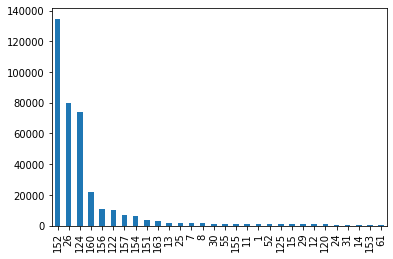

In [256]:
df.Policy_Sales_Channel.value_counts()[:30].plot.bar()

Похоже канал продаж под id 152 - самый распространённый.

Из полезного - можем посчитать средний респонс рейт по каналам.

In [173]:
channel_response_rate = df.groupby('Policy_Sales_Channel').Response.mean().sort_values(ascending=False)

Какой респонс рейт на самом частотной канале?

In [174]:
channel_response_rate.loc[156]

0.21545821217521807

#### Вывести информацию о том мужчине, который брал страховку и имеет минимальный возраст.

In [177]:
df.query('Driving_License==1')

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Driving License
id,,,,,,,,,,,,
1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26,217,1,1
2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26,183,0,1
3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26,27,1,1
4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152,203,0,1
5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152,39,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26,88,0,1
381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152,131,0,1
381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160,161,0,1


In [178]:
insured_men = df.query('"Gender"=="Male" and Previously_Insured==1')

Кстати, если бы у нас колонки содержали пробелы, то в `query` мы бы к ним обращались следующим образом:

In [179]:
df['Previously Insured'] = df.Previously_Insured

In [180]:
result = df.query('"Gender"=="Male" and `Previously Insured`==1')

Альтернативно можно сделать так.

In [185]:
insured_men = df[(df.Gender=="Male") & (df.Previously_Insured==1)]

Без круглых скобок работать не будет!

In [181]:
df[df.Gender=="Male" & df.Previously_Insured==1]

TypeError: Cannot perform 'rand_' with a dtyped [int64] array and scalar of type [bool]

In [186]:
min_age = insured_men.Age.min()

In [187]:
min_age

20

In [188]:
insured_men.query(f'Age=={min_age}')

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Driving License,Previously Insured
id,,,,,,,,,,,,,
148,Male,20,1,39.0,1,< 1 Year,No,28329.0,160,78,0,1,1
161,Male,20,1,3.0,1,< 1 Year,No,41914.0,160,206,0,1,1
331,Male,20,1,28.0,1,< 1 Year,No,31367.0,160,255,0,1,1
336,Male,20,1,29.0,1,1-2 Year,No,2630.0,157,271,0,1,1
354,Male,20,1,8.0,1,< 1 Year,No,38076.0,160,79,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
379684,Male,20,1,27.0,1,< 1 Year,No,27650.0,160,253,0,1,1
379776,Male,20,1,47.0,1,< 1 Year,No,41334.0,160,243,0,1,1
380204,Male,20,1,6.0,1,< 1 Year,No,30732.0,160,136,0,1,1


Видим, что есть целых 1133 мужчины с возрастом 20 лет, кто ранее был застрахован.

#### Как распределено среднее по Response по полу и совокупности колонок Vehicle_Age и Previously_Insured?

Пареметр метода `DataFrame.pivot_table` `aggfunc` имеет значение 'mean' по умовлчанию.

In [189]:
pivot = df.pivot_table(index=['Gender'], columns=['Previously_Insured', 'Vehicle_Age'], values=['Response'])

In [190]:
pivot

Response                                                  
Previously_Insured         0                             1                    
Vehicle_Age         1-2 Year  < 1 Year > 2 Years  1-2 Year  < 1 Year > 2 Years
Gender                                                                        
Female              0.257461  0.110141  0.267898  0.001453  0.000389  0.000000
Male                0.256933  0.149561  0.309264  0.001455  0.000800  0.041667

Видим, что мужчины в среднем чаще страхуют авто. Разница особенно видна, когда авто более 2х лет и ранее оно не было затраховано.  
Когда авто 1-2 года и оно ранее не было застраховано, то мужчины и женщины почти в одинаковой мере страхуют авто в среднем.

Можем также посмотреть, сколько людей было в каждом сегменте.

In [192]:
pivot2 = df.pivot_table(index=['Gender'], columns=['Previously_Insured', 'Vehicle_Age'], values=['Response'], aggfunc='count')